In [10]:
import hdf5_getters
import numpy as np
import pandas as pd
import os
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/MSS.csv')

In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
b_remove = ['artist_id','artist_mbid','artist_location','track_id','artist_location',
            'artist_name']

for col in b_remove:
    df[col] = df[col].transform(lambda x: x[2:-1])

b_arr_remove = ['artist_mbtags','similar_artists', 'tatums_confidence']

f = lambda x: x[2:-1]
for col in b_arr_remove:
    if len(df[col]) > 0:
        df[col] = [f(x) for x in df[col]]
        
df.head()

,num_songs,artist_familiarity,artist_hotttnesss,artist_id,artist_mbid,artist_playmeid,artist_7digitalid,artist_latitude,artist_longitude,artist_location,...,sections_confidence,beats_start,beats_confidence,bars_start,bars_confidence,tatums_start,tatums_confidence,artist_mbtags,artist_mbtags_count,year
0,1,0.681091,0.488536,ARN2ZKL1187FB3972B,d25fa5a6-92bf-46a3-8bf7-31149b62eb84,-1,4043,37.16793,-95.84502,"A \tCalifornia, Estados Unidos",...,[1. 0.199 0.607 0.251 0.547 0.487],[ 0.38608 0.76217 1.10874 1.459 1.8...,[0.881 0.791 0.703 0.456 0.451 0.231 0.812 0.6...,[ 1.10874 2.63933 4.21584 5.72099 7.2...,[0.046 0.012 0.305 0.008 0.261 0.022 0.026 0.0...,[ 0.19895 0.38608 0.57689 0.76217 0.9...,.318 0.305 0.252 0.214 0.161 0.136 0.114 0.106...,,[],2000
1,1,0.487446,0.383141,ARYV1OT1187B9B4C8E,2d67f7f4-1e85-4278-bac6-424e6204a8b9,38963,108554,NaN,NaN,,...,[1. 0.318 0.307 0.431 0.858 0.543 0.697 0.7...,[ 0.26838 0.74603 1.22005 1.70477 2.1...,[0.778 0.721 0.366 0.505 0.449 0.736 0.509 0.4...,[ 0.26838 2.18829 4.12 6.02908 7.9...,[0.001 0.042 0.355 0.094 0.103 0.015 0.066 0.2...,[ 0.26838 0.5078 0.74603 0.98545 1.2...,.728 0.646 0.585 0.55 0.502 0.482 0.452 0.43 ...,'country',[1],0
2,1,0.527545,0.000000,ARGAJDQ11F50C4EDDF,,-1,189049,NaN,NaN,,...,[1. 0.045 0.17 ],[ 0.76111 2.0448 3.31213 4.41765 5.43229 ...,[1. 0.91 0.88 0.679 0.802 0.939 0.58 0.7...,[ 0.76111 2.0448 3.31213 4.41765 5.43229 ...,[1. 0.91 0.88 0.679 0.802 0.939 0.58 0.7...,[ 0.76111 1.39968 2.0448 2.68665 3.31213 ...,.042 0.04 0.042 0.054 0.048 0.09 0.107 0.103...,,[],0
3,1,0.641354,0.384231,ARMG34A1187FB548A8,5a8cc407-7efb-4e94-9637-d5896395e754,11521,503,30.08374,31.25536,"iro, Egyp",...,[1. 1. 0.848 0.103 0.365 0.386 0.171 0.4...,[1.4195000e-01 8.3039000e-01 1.5046900e+00 2.1...,[0.548 0. 0.345 0. 0.178 0.088 0.17 0. ...,[1.4195000e-01 2.8268500e+00 5.6137300e+00 8.3...,[0.147 0.229 0.921 0.44 0.261 0.846 0.054 0.4...,[1.4195000e-01 3.6990000e-01 6.0129000e-01 ......,.326 0.319 0.298 ... 0.058 0.049 0.046,'uk' b'british' b'english' b'rock and indie' b...,[1 1 1 1 1 1],1984
4,1,0.461741,0.334252,ARDZJ6H1187FB387F2,5b5d63ac-e78e-459e-abab-5e90e3dddbb5,3542,29156,NaN,NaN,,...,[1. 0.753 0.698 0.502 0.598 0.533 1. 0.9...,[6.1900000e-02 3.4778000e-01 6.3225000e-01 9.1...,[0.898 0.574 0.528 0.502 0. 0.253 0.42 0.2...,[6.1900000e-02 9.1461000e-01 1.7497500e+00 2.5...,[0.264 0.204 0.289 0.291 0.081 0.315 0.038 0.0...,[6.1900000e-02 2.0659000e-01 3.4778000e-01 ......,.415 0.408 0.362 ... 0. 0. 0.,,[],0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num_songs                   10000 non-null  int64  
 1   artist_familiarity          9996 non-null   float64
 2   artist_hotttnesss           10000 non-null  float64
 3   artist_id                   10000 non-null  object 
 4   artist_mbid                 10000 non-null  object 
 5   artist_playmeid             10000 non-null  int64  
 6   artist_7digitalid           10000 non-null  int64  
 7   artist_latitude             3742 non-null   float64
 8   artist_longitude            3742 non-null   float64
 9   artist_location             10000 non-null  object 
 10  artist_name                 10000 non-null  object 
 11  release                     10000 non-null  object 
 12  release_7digitalid          10000 non-null  int64  
 13  song_id                     1000

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 100)
df.head(100)


,num_songs,artist_familiarity,artist_hotttnesss,artist_id,artist_mbid,artist_playmeid,artist_7digitalid,artist_latitude,artist_longitude,artist_location,artist_name,release,release_7digitalid,song_id,song_hotttnesss,title,track_7digitalid,similar_artists,artist_terms,artist_terms_freq,artist_terms_weight,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,track_id,segments_start,segments_confidence,segments_pitches,segments_timbre,segments_loudness_max,segments_loudness_max_time,segments_loudness_start,sections_start,sections_confidence,beats_start,beats_confidence,bars_start,bars_confidence,tatums_start,tatums_confidence,artist_mbtags,artist_mbtags_count,year
0,1,0.681091,0.488536,ARN2ZKL1187FB3972B,d25fa5a6-92bf-46a3-8bf7-31149b62eb84,-1,4043,37.16793,-95.84502,"A \tCalifornia, Estados Unidos",The Distillers,b'The Distillers',205356,b'SONWRPE12A58A7B042',0.767075,b'Oh Serena',2225284,'AR4SBWX1187FB4D6BE' b'AR4503W1187B9A0BAD' b'ARKODWN1187B9AD3AE'\n b'ARF84A41187B9A34E7' b'ARHZT...,[b'grunge' b'punk' b'rock' b'california' b'street punk'\n b'alternative pop rock' b'punk revival...,[0.98094688 1. 0.98236343 0.65916723 0.60937343 0.49925846\n 0.46010333 0.45312639 0.360...,[1. 0.87089063 0.79988353 0.76235703 0.76234412 0.69410128\n 0.66367079 0.56231208 0.470...,22050,b'd2f649c88af05e3730a98f600592fb30',0.0,152.68526,0.328,0.0,3,0.252,-4.048,1,0.082,152.685,162.727,4,0.336,TRAMMQW128F42621E1,[ 0. 0.32798 0.99556 1.73256 2.20295 2.54005 2.80662\n 3.0332 3.23039 3...,[0. 1. 0.03 0.285 0.273 0.427 1. 0.45 0.64 1. 0.968 0.216\n 0.133 0.242 0.261 0.3...,[[1. 1. 1. ... 1. 1. 1. ]\n [1. 0.689 0.567 ... 0.62 0.698 0.654]\n [1. ...,[[ 0. 171.13 9.469 ... 0.973 -10.64 -7.228]\n [ 26.494 3.995 62.038 ... 58.736 -...,[-60. -18.013 -40.939 -43.394 -42.711 -41.99 -11.337 -15.344 -14.458\n -5.191 -4.621 -2.4...,[0. 0.1073 0.04784 0.08429 0.22478 0.07192 0.06225 0.02484 0.04047\n 0.01833 0.05737 0.016...,[-60. -60. -42.962 -46.31 -47.288 -46.327 -45.772 -20.262 -22.538\n -21.747 -14.658 -5.1...,[ 0. 23.30518 48.18039 70.26274 102.87516 127.56187],[1. 0.199 0.607 0.251 0.547 0.487],[ 0.38608 0.76217 1.10874 1.459 1.83233 2.22888 2.63933\n 3.04766 3.44468 3...,[0.881 0.791 0.703 0.456 0.451 0.231 0.812 0.647 0.682 0.425 0.27 0.218\n 0.3 0.407 0.375 0.0...,[ 1.10874 2.63933 4.21584 5.72099 7.20986 8.68806 10.15597\n 11.62169 13.08319 14...,[0.046 0.012 0.305 0.008 0.261 0.022 0.026 0.077 0.152 0.175 0.355 0.052\n 0. 0.248 0.115 0.0...,[ 0.19895 0.38608 0.57689 0.76217 0.93638 1.10874 1.28295\n 1.459 1.64244 1...,.318 0.305 0.252 0.214 0.161 0.136 0.114 0.106 0.106 0.092 0.427 0.435\n 0.443 0.45 0.415 0.356...,,[],2000
1,1,0.487446,0.383141,ARYV1OT1187B9B4C8E,2d67f7f4-1e85-4278-bac6-424e6204a8b9,38963,108554,NaN,NaN,,Commander Cody And His Lost Planet Airmen,b'Commander Cody & His Lost Planet Airmen',138329,b'SOPBCHO12A8AE4808C',NaN,b'Hawaii Blues (Album Version)',1436039,'ARBCUKT1187FB52F2A' b'ARDW6SG1187B9977DF' b'AR0CDSK1187FB52ED6'\n b'AR223M11187B9ADDD6' b'ARGJ0...,[b'country rock' b'western swing' b'southern rock' b'roots rock'\n b'rockabilly' b'classic rock'...,[0.95777578 0.95777578 0.95777578 0.92426054 1. 0.95777578\n 0.95777578 1. 0.744...,[1. 1. 0.99046234 0.97495935 0.97110496 0.87062827\n 0.85303292 0.78097524 0.733...,22050,b'7faaf7bdfa408938896a25d4294eb6bc',0.0,185.44281,0.000,0.0,4,0.449,-8.353,1,0.296,176.536,123.713,4,0.054,TRAMMCH128F4241EBD,[ 0. 0.43846 0.76304 0.9205 1.40812 1.76798 1.90082\n 2.38299 2.59202 2...,[1. 0.026 0.548 1. 0.835 0.1 0.696 0.912 0.647 0.7 0.736 0.842\n 0.232 0.746 0.848 0.8...,[[0.125 0.25 0.272 ... 0.171 0.503 0.296]\n [0.167 0.057 0.311 ... 0.024 0.043 0.807]\n [0.408 ...,[[ 9.689 114.448 143.205 ... 18.551 132.188 -27.081]\n [ 38.745 -107.962 190.156 ... ...,[-14.588 -20.263 -20.053 -8.678 -7.938 -16.016 -9.746 -7.479 -13.508\n -13.746 -10.143 -8.2...,[0.27949 0

In [6]:
for col in df.columns:
    print(df[col][:5])

0    1
1    1
2    1
3    1
4    1
Name: num_songs, dtype: int64
0    0.681091
1    0.487446
2    0.527545
3    0.641354
4    0.461741
Name: artist_familiarity, dtype: float64
0    0.488536
1    0.383141
2    0.000000
3    0.384231
4    0.334252
Name: artist_hotttnesss, dtype: float64
0    ARN2ZKL1187FB3972B
1    ARYV1OT1187B9B4C8E
2    ARGAJDQ11F50C4EDDF
3    ARMG34A1187FB548A8
4    ARDZJ6H1187FB387F2
Name: artist_id, dtype: object
0    d25fa5a6-92bf-46a3-8bf7-31149b62eb84
1    2d67f7f4-1e85-4278-bac6-424e6204a8b9
2                                        
3    5a8cc407-7efb-4e94-9637-d5896395e754
4    5b5d63ac-e78e-459e-abab-5e90e3dddbb5
Name: artist_mbid, dtype: object
0       -1
1    38963
2       -1
3    11521
4     3542
Name: artist_playmeid, dtype: int64
0      4043
1    108554
2    189049
3       503
4     29156
Name: artist_7digitalid, dtype: int64
0    37.16793
1         NaN
2         NaN
3    30.08374
4         NaN
Name: artist_latitude, dtype: float64
0   -95.84502
1        

Name: bars_start, dtype: object
0    [0.046 0.012 0.305 0.008 0.261 0.022 0.026 0.0...
1    [0.001 0.042 0.355 0.094 0.103 0.015 0.066 0.2...
2    [1.    0.91  0.88  0.679 0.802 0.939 0.58  0.7...
3    [0.147 0.229 0.921 0.44  0.261 0.846 0.054 0.4...
4    [0.264 0.204 0.289 0.291 0.081 0.315 0.038 0.0...
Name: bars_confidence, dtype: object
0    [  0.19895   0.38608   0.57689   0.76217   0.9...
1    [  0.26838   0.5078    0.74603   0.98545   1.2...
2    [ 0.76111  1.39968  2.0448   2.68665  3.31213 ...
3    [1.4195000e-01 3.6990000e-01 6.0129000e-01 ......
4    [6.1900000e-02 2.0659000e-01 3.4778000e-01 ......
Name: tatums_start, dtype: object
0    .318 0.305 0.252 0.214 0.161 0.136 0.114 0.106...
1    .728 0.646 0.585 0.55  0.502 0.482 0.452 0.43 ...
2    .042 0.04  0.042 0.054 0.048 0.09  0.107 0.103...
3               .326 0.319 0.298 ... 0.058 0.049 0.046
4               .415 0.408 0.362 ... 0.    0.    0.   
Name: tatums_confidence, dtype: object
0                                

In [7]:
is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))
criteria = is_number(df.dtypes)
df.loc[:, criteria | (df.columns == 'track_id')]
df.set_index('track_id',inplace=True)

In [8]:
df.head()

,num_songs,artist_familiarity,artist_hotttnesss,artist_id,artist_mbid,artist_playmeid,artist_7digitalid,artist_latitude,artist_longitude,artist_location,...,sections_confidence,beats_start,beats_confidence,bars_start,bars_confidence,tatums_start,tatums_confidence,artist_mbtags,artist_mbtags_count,year
track_id,,,,,,,,,,,,,,,,,,,,,
TRAMMQW128F42621E1,1,0.681091,0.488536,ARN2ZKL1187FB3972B,d25fa5a6-92bf-46a3-8bf7-31149b62eb84,-1,4043,37.16793,-95.84502,"A \tCalifornia, Estados Unidos",...,[1. 0.199 0.607 0.251 0.547 0.487],[ 0.38608 0.76217 1.10874 1.459 1.8...,[0.881 0.791 0.703 0.456 0.451 0.231 0.812 0.6...,[ 1.10874 2.63933 4.21584 5.72099 7.2...,[0.046 0.012 0.305 0.008 0.261 0.022 0.026 0.0...,[ 0.19895 0.38608 0.57689 0.76217 0.9...,.318 0.305 0.252 0.214 0.161 0.136 0.114 0.106...,,[],2000
TRAMMCH128F4241EBD,1,0.487446,0.383141,ARYV1OT1187B9B4C8E,2d67f7f4-1e85-4278-bac6-424e6204a8b9,38963,108554,NaN,NaN,,...,[1. 0.318 0.307 0.431 0.858 0.543 0.697 0.7...,[ 0.26838 0.74603 1.22005 1.70477 2.1...,[0.778 0.721 0.366 0.505 0.449 0.736 0.509 0.4...,[ 0.26838 2.18829 4.12 6.02908 7.9...,[0.001 0.042 0.355 0.094 0.103 0.015 0.066 0.2...,[ 0.26838 0.5078 0.74603 0.98545 1.2...,.728 0.646 0.585 0.55 0.502 0.482 0.452 0.43 ...,'country',[1],0
TRAMMTK128F4279CD2,1,0.527545,0.000000,ARGAJDQ11F50C4EDDF,,-1,189049,NaN,NaN,,...,[1. 0.045 0.17 ],[ 0.76111 2.0448 3.31213 4.41765 5.43229 ...,[1. 0.91 0.88 0.679 0.802 0.939 0.58 0.7...,[ 0.76111 2.0448 3.31213 4.41765 5.43229 ...,[1. 0.91 0.88 0.679 0.802 0.939 0.58 0.7...,[ 0.76111 1.39968 2.0448 2.68665 3.31213 ...,.042 0.04 0.042 0.054 0.048 0.09 0.107 0.103...,,[],0
TRAMMDO128E0781A5D,1,0.641354,0.384231,ARMG34A1187FB548A8,5a8cc407-7efb-4e94-9637-d5896395e754,11521,503,30.08374,31.25536,"iro, Egyp",...,[1. 1. 0.848 0.103 0.365 0.386 0.171 0.4...,[1.4195000e-01 8.3039000e-01 1.5046900e+00 2.1...,[0.548 0. 0.345 0. 0.178 0.088 0.17 0. ...,[1.4195000e-01 2.8268500e+00 5.6137300e+00 8.3...,[0.147 0.229 0.921 0.44 0.261 0.846 0.054 0.4...,[1.4195000e-01 3.6990000e-01 6.0129000e-01 ......,.326 0.319 0.298 ... 0.058 0.049 0.046,'uk' b'british' b'english' b'rock and indie' b...,[1 1 1 1 1 1],1984
TRAMMTQ12903CA4FE7,1,0.461741,0.334252,ARDZJ6H1187FB387F2,5b5d63ac-e78e-459e-abab-5e90e3dddbb5,3542,29156,NaN,NaN,,...,[1. 0.753 0.698 0.502 0.598 0.533 1. 0.9...,[6.1900000e-02 3.4778000e-01 6.3225000e-01 9.1...,[0.898 0.574 0.528 0.502 0. 0.253 0.42 0.2...,[6.1900000e-02 9.1461000e-01 1.7497500e+00 2.5...,[0.264 0.204 0.289 0.291 0.081 0.315 0.038 0.0...,[6.1900000e-02 2.0659000e-01 3.4778000e-01 ......,.415 0.408 0.362 ... 0. 0. 0.,,[],0


In [9]:
# tp = pd.read_csv('../data/taste_profile_usercat_120k.txt',delimiter="\n", header=None)

In [30]:
tt = pd.read_csv('../data/train_triplets.txt',delimiter='\t', header=None)
tt.columns = ['user_id', 'track_id','plays']

In [31]:
tt.head()

,user_id,track_id,plays
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [32]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48373586 entries, 0 to 48373585
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   object
 1   track_id  object
 2   plays     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ GB


In [33]:
print(tt.plays[tt.plays > 1000].shape[0]/tt.plays.shape[0])
tt.describe()

1.2816912105709921e-06


,plays
count,4.837359e+07
mean,2.866859e+00
std,6.437725e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.667000e+03


In [38]:
num_users = tt.user_id.unique().shape[0]
num_songs = tt.track_id.unique().shape[0]
num_entries = tt.shape[0]
sparsity = num_entries/(num_users*num_songs)*100
print(sparsity)

0.012340998279304207


3.985291718592888


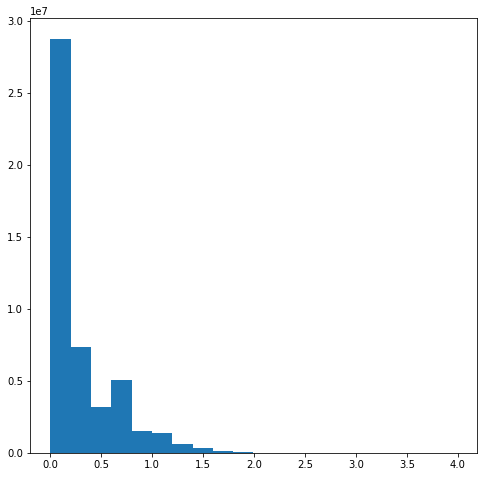

In [39]:
fig,ax = plt.subplots(figsize=(8,8))
ax.hist(np.log10(tt.plays),bins = 20);
print(np.max(np.log10(tt['plays'])))

In [40]:
tt.plays = tt.plays.transform(lambda x: 100 if x > 100 else x)
max_log_plays = np.max(np.log10(tt['plays']))
tt['rating'] = np.log10(tt.plays)/max_log_plays
tt = tt.drop(columns='plays')
tt.head()

,user_id,track_id,rating
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,0.000000
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,0.000000
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,0.150515
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,0.000000
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,0.000000


In [41]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48373586 entries, 0 to 48373585
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   object 
 1   track_id  object 
 2   rating    float64
dtypes: float64(1), object(2)
memory usage: 1.1+ GB


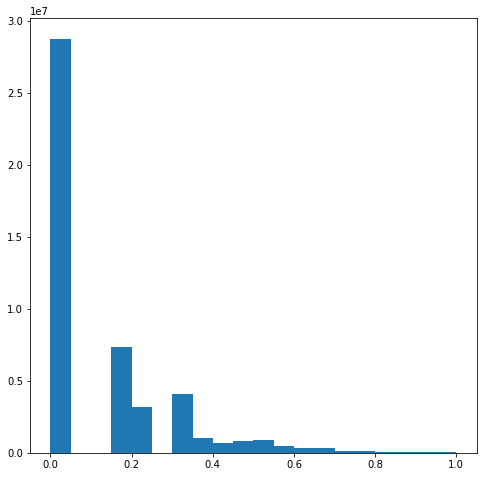

In [42]:
fig,ax = plt.subplots(figsize=(8,8))
ax.hist(tt.rating,bins = 20);
# print(np.max(tt['rating'])))

In [43]:
tt.shape

(48373586, 3)

In [44]:
tt.groupby('user_id').count()['track_id'].mean()

47.45681524313316

In [45]:
tt.groupby('track_id').count()['user_id'].mean()

125.79401684063805

In [46]:
track_popularity = tt.groupby('track_id').count()['user_id']

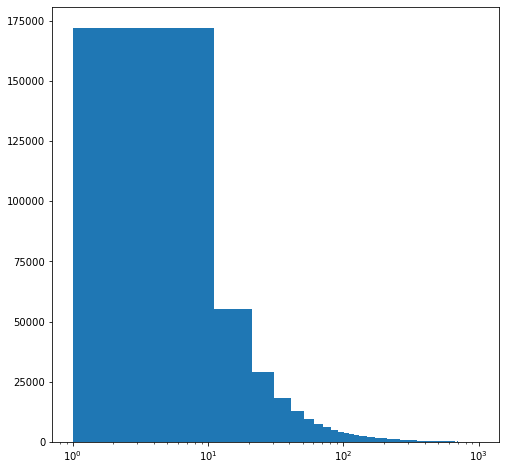

In [47]:
fig,ax = plt.subplots(figsize=(8,8))
ax.hist(track_popularity[track_popularity<1e3],bins = 100);
ax.set_xscale('log')

In [48]:
track_popularity.describe(percentiles = [.01, .05, .1, .25, .5, .75, .9, .95, .99])

count    384546.000000
mean        125.794017
std         799.025834
min           1.000000
1%            1.000000
5%            1.000000
10%           2.000000
25%           4.000000
50%          13.000000
75%          52.000000
90%         218.000000
95%         488.000000
99%        1970.000000
max      110479.000000
Name: user_id, dtype: float64

In [49]:
top_tracks = tt['track_id'].value_counts()[:100].index.tolist()
tt = tt[tt['track_id'].isin(top_tracks)]
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3431406 entries, 22 to 48373583
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   object 
 1   track_id  object 
 2   rating    float64
dtypes: float64(1), object(2)
memory usage: 104.7+ MB


In [50]:
tt['track_id'].value_counts()

SOFRQTD12A81C233C0    110479
SOAUWYT12A81C206F1     90476
SOAXGDH12A8C13F8A1     90444
SOBONKR12A58A7A7E0     84000
SOSXLTC12AF72A7F54     80656
                       ...  
SOKOXWU12AF72AD1BC     20555
SOGCWUH12AC90732B0     20439
SORJICW12A8C13640D     20404
SODCNJX12A6D4F93CB     20278
SOISNSU12AC468C0D8     20197
Name: track_id, Length: 100, dtype: int64

In [51]:
tt['rating'].mean()

0.1625454590083587

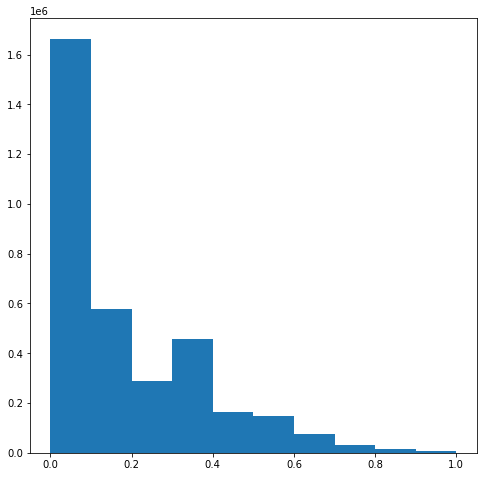

In [52]:
fig,ax = plt.subplots(figsize=(8,8))
ax.hist(tt['rating'],bins = 10);

In [53]:
tt['rating'].describe(percentiles = [.01, .05, .1, .25, .5, .75, .9, .95, .99])

count    3.431406e+06
mean     1.625455e-01
std      1.989782e-01
min      0.000000e+00
1%       0.000000e+00
5%       0.000000e+00
10%      0.000000e+00
25%      0.000000e+00
50%      1.505150e-01
75%      3.010300e-01
90%      4.515450e-01
95%      5.569717e-01
99%      7.592570e-01
max      1.000000e+00
Name: rating, dtype: float64

In [54]:
num_users = tt.user_id.unique().shape[0]
num_songs = tt.track_id.unique().shape[0]
num_entries = tt.shape[0]
sparsity = num_entries/(num_users*num_songs)*100
print(sparsity)

5.140583029843613


In [ ]:
jam_msd = pd.read_csv('../data/jam_to_msd.tsv',delimiter='\t')
jam_msd.columns = ['jam_id','track_id']
jam_msd.set_index('track_id',inplace=True)

In [14]:
jam_msd.head()

,jam_id
track_id,
TRIULJC128F429EC15,6c63486ccec9f7a1d77b9b7db35b61ef
TRZTLJV128F149EF6C,7c7ba45c3b8f613b1887babf248e6293
TRMJKEU128F1457E80,34a81ea1e4e3aa292a0d759dc0731fd3
TRENTGL128E0780C8E,721f626ed68d788e130a1543ba0c362b
TROSYZC128F422AA3A,721f626ed68d788e130a1543ba0c362b


In [15]:
jam_msd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1026209 entries, TRIULJC128F429EC15 to TRQKCZZ128F424329D
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jam_id  1026209 non-null  object
dtypes: object(1)
memory usage: 15.7+ MB


In [16]:
jams = pd.read_csv('../data/jams/jams.tsv', sep = '\t',error_bad_lines=False,engine='python')
likes = pd.read_csv('../data/jams/likes.tsv',delimiter='\t')
followers = pd.read_csv('../data/jams/followers.tsv',delimiter='\t')

Skipping line 670: '	' expected after '"'
Skipping line 2736: '	' expected after '"'
Skipping line 3865: '	' expected after '"'
Skipping line 4885: '	' expected after '"'
Skipping line 11231: '	' expected after '"'
Skipping line 12239: '	' expected after '"'
Skipping line 15901: '	' expected after '"'
Skipping line 16878: '	' expected after '"'
Skipping line 20882: '	' expected after '"'
Skipping line 21199: '	' expected after '"'
Skipping line 21650: '	' expected after '"'
Skipping line 22062: '	' expected after '"'
Skipping line 22749: '	' expected after '"'
Skipping line 22750: '	' expected after '"'
Skipping line 23364: '	' expected after '"'
Skipping line 25087: '	' expected after '"'
Skipping line 26756: '	' expected after '"'
Skipping line 26805: '	' expected after '"'
Skipping line 27240: '	' expected after '"'
Skipping line 27780: '	' expected after '"'
Skipping line 28451: '	' expected after '"'
Skipping line 29008: '	' expected after '"'
Skipping line 30657: '	' expected aft

Skipping line 177475: '	' expected after '"'
Skipping line 177749: '	' expected after '"'
Skipping line 178313: '	' expected after '"'
Skipping line 178443: '	' expected after '"'
Skipping line 178479: '	' expected after '"'
Skipping line 178671: '	' expected after '"'
Skipping line 178733: '	' expected after '"'
Skipping line 179077: '	' expected after '"'
Skipping line 180656: '	' expected after '"'
Skipping line 180998: '	' expected after '"'
Skipping line 181587: '	' expected after '"'
Skipping line 181793: '	' expected after '"'
Skipping line 182257: '	' expected after '"'
Skipping line 183435: '	' expected after '"'
Skipping line 184428: '	' expected after '"'
Skipping line 186494: '	' expected after '"'
Skipping line 186802: '	' expected after '"'
Skipping line 187371: '	' expected after '"'
Skipping line 188244: '	' expected after '"'
Skipping line 188367: '	' expected after '"'
Skipping line 190748: '	' expected after '"'
Skipping line 191318: '	' expected after '"'
Skipping l

Skipping line 337246: '	' expected after '"'
Skipping line 339059: '	' expected after '"'
Skipping line 341543: '	' expected after '"'
Skipping line 341782: '	' expected after '"'
Skipping line 342946: '	' expected after '"'
Skipping line 344559: '	' expected after '"'
Skipping line 346106: '	' expected after '"'
Skipping line 346652: '	' expected after '"'
Skipping line 346902: '	' expected after '"'
Skipping line 347449: '	' expected after '"'
Skipping line 351465: '	' expected after '"'
Skipping line 351656: '	' expected after '"'
Skipping line 352014: '	' expected after '"'
Skipping line 352304: '	' expected after '"'
Skipping line 352738: '	' expected after '"'
Skipping line 353051: '	' expected after '"'
Skipping line 354787: '	' expected after '"'
Skipping line 354987: '	' expected after '"'
Skipping line 355994: '	' expected after '"'
Skipping line 357241: '	' expected after '"'
Skipping line 357270: '	' expected after '"'
Skipping line 357334: '	' expected after '"'
Skipping l

Skipping line 508061: '	' expected after '"'
Skipping line 509147: '	' expected after '"'
Skipping line 509563: '	' expected after '"'
Skipping line 509666: '	' expected after '"'
Skipping line 509856: '	' expected after '"'
Skipping line 511643: '	' expected after '"'
Skipping line 512294: '	' expected after '"'
Skipping line 513899: '	' expected after '"'
Skipping line 514170: '	' expected after '"'
Skipping line 517804: '	' expected after '"'
Skipping line 518380: '	' expected after '"'
Skipping line 520046: '	' expected after '"'
Skipping line 520502: '	' expected after '"'
Skipping line 520920: '	' expected after '"'
Skipping line 521487: '	' expected after '"'
Skipping line 521889: '	' expected after '"'
Skipping line 522123: '	' expected after '"'
Skipping line 522647: '	' expected after '"'
Skipping line 524599: '	' expected after '"'
Skipping line 525030: '	' expected after '"'
Skipping line 525358: '	' expected after '"'
Skipping line 525621: '	' expected after '"'
Skipping l

Skipping line 666566: '	' expected after '"'
Skipping line 666611: '	' expected after '"'
Skipping line 666709: '	' expected after '"'
Skipping line 666726: '	' expected after '"'
Skipping line 667215: '	' expected after '"'
Skipping line 667916: '	' expected after '"'
Skipping line 668557: '	' expected after '"'
Skipping line 669619: '	' expected after '"'
Skipping line 670918: '	' expected after '"'
Skipping line 672452: '	' expected after '"'
Skipping line 674519: '	' expected after '"'
Skipping line 674582: '	' expected after '"'
Skipping line 676672: '	' expected after '"'
Skipping line 676680: '	' expected after '"'
Skipping line 677944: '	' expected after '"'
Skipping line 678150: '	' expected after '"'
Skipping line 678367: '	' expected after '"'
Skipping line 680121: '	' expected after '"'
Skipping line 681028: '	' expected after '"'
Skipping line 681222: '	' expected after '"'
Skipping line 684121: '	' expected after '"'
Skipping line 684770: '	' expected after '"'
Skipping l

Skipping line 818692: '	' expected after '"'
Skipping line 818980: '	' expected after '"'
Skipping line 819342: '	' expected after '"'
Skipping line 822272: '	' expected after '"'
Skipping line 822280: '	' expected after '"'
Skipping line 825714: '	' expected after '"'
Skipping line 827297: '	' expected after '"'
Skipping line 828811: '	' expected after '"'
Skipping line 829945: '	' expected after '"'
Skipping line 829968: '	' expected after '"'
Skipping line 830069: '	' expected after '"'
Skipping line 830077: '	' expected after '"'
Skipping line 830488: '	' expected after '"'
Skipping line 830556: '	' expected after '"'
Skipping line 830621: '	' expected after '"'
Skipping line 831168: '	' expected after '"'
Skipping line 831592: '	' expected after '"'
Skipping line 832542: '	' expected after '"'
Skipping line 832604: '	' expected after '"'
Skipping line 834158: '	' expected after '"'
Skipping line 835829: '	' expected after '"'
Skipping line 836384: '	' expected after '"'
Skipping l

Skipping line 1002385: '	' expected after '"'
Skipping line 1002434: '	' expected after '"'
Skipping line 1004613: '	' expected after '"'
Skipping line 1005851: '	' expected after '"'
Skipping line 1006280: '	' expected after '"'
Skipping line 1007303: '	' expected after '"'
Skipping line 1007567: '	' expected after '"'
Skipping line 1007642: '	' expected after '"'
Skipping line 1009013: '	' expected after '"'
Skipping line 1009130: '	' expected after '"'
Skipping line 1009178: '	' expected after '"'
Skipping line 1010458: '	' expected after '"'
Skipping line 1010749: '	' expected after '"'
Skipping line 1012451: '	' expected after '"'
Skipping line 1012810: '	' expected after '"'
Skipping line 1013889: '	' expected after '"'
Skipping line 1014575: '	' expected after '"'
Skipping line 1014794: '	' expected after '"'
Skipping line 1015171: '	' expected after '"'
Skipping line 1016514: '	' expected after '"'
Skipping line 1018726: '	' expected after '"'
Skipping line 1020467: '	' expecte

Skipping line 1127381: '	' expected after '"'
Skipping line 1127715: '	' expected after '"'
Skipping line 1131275: '	' expected after '"'
Skipping line 1131319: '	' expected after '"'
Skipping line 1131836: '	' expected after '"'
Skipping line 1132139: '	' expected after '"'
Skipping line 1132633: '	' expected after '"'
Skipping line 1132677: '	' expected after '"'
Skipping line 1132767: '	' expected after '"'
Skipping line 1133114: '	' expected after '"'
Skipping line 1133506: '	' expected after '"'
Skipping line 1136447: '	' expected after '"'
Skipping line 1137847: '	' expected after '"'
Skipping line 1139834: '	' expected after '"'
Skipping line 1140225: '	' expected after '"'
Skipping line 1141211: '	' expected after '"'
Skipping line 1142320: '	' expected after '"'
Skipping line 1142364: '	' expected after '"'
Skipping line 1142883: '	' expected after '"'
Skipping line 1143418: '	' expected after '"'
Skipping line 1143965: '	' expected after '"'
Skipping line 1144857: '	' expecte

Skipping line 1316433: '	' expected after '"'
Skipping line 1316828: '	' expected after '"'
Skipping line 1317111: '	' expected after '"'
Skipping line 1317269: '	' expected after '"'
Skipping line 1317420: '	' expected after '"'
Skipping line 1317678: '	' expected after '"'
Skipping line 1317925: '	' expected after '"'
Skipping line 1318315: '	' expected after '"'
Skipping line 1321102: '	' expected after '"'
Skipping line 1321240: '	' expected after '"'
Skipping line 1323122: '	' expected after '"'
Skipping line 1323576: '	' expected after '"'
Skipping line 1323588: '	' expected after '"'
Skipping line 1323646: '	' expected after '"'
Skipping line 1324596: '	' expected after '"'
Skipping line 1325730: '	' expected after '"'
Skipping line 1325906: '	' expected after '"'
Skipping line 1326903: '	' expected after '"'
Skipping line 1326955: '	' expected after '"'
Skipping line 1327308: '	' expected after '"'
Skipping line 1327581: '	' expected after '"'
Skipping line 1328220: '	' expecte

Skipping line 1459068: '	' expected after '"'
Skipping line 1459113: '	' expected after '"'
Skipping line 1459267: '	' expected after '"'
Skipping line 1459437: '	' expected after '"'
Skipping line 1459480: '	' expected after '"'
Skipping line 1460024: '	' expected after '"'
Skipping line 1460084: '	' expected after '"'
Skipping line 1460163: '	' expected after '"'
Skipping line 1463452: '	' expected after '"'
Skipping line 1463547: '	' expected after '"'
Skipping line 1464015: '	' expected after '"'
Skipping line 1464997: '	' expected after '"'
Skipping line 1465555: '	' expected after '"'
Skipping line 1466446: '	' expected after '"'
Skipping line 1466455: '	' expected after '"'
Skipping line 1466934: '	' expected after '"'
Skipping line 1468727: '	' expected after '"'
Skipping line 1469106: '	' expected after '"'
Skipping line 1469169: '	' expected after '"'
Skipping line 1469878: '	' expected after '"'
Skipping line 1470495: '	' expected after '"'
Skipping line 1471236: '	' expecte

Skipping line 1624537: '	' expected after '"'
Skipping line 1625559: '	' expected after '"'
Skipping line 1630022: '	' expected after '"'
Skipping line 1630352: '	' expected after '"'
Skipping line 1634044: '	' expected after '"'
Skipping line 1634453: '	' expected after '"'
Skipping line 1635237: '	' expected after '"'
Skipping line 1635390: '	' expected after '"'
Skipping line 1637373: '	' expected after '"'
Skipping line 1637827: '	' expected after '"'
Skipping line 1639321: '	' expected after '"'
Skipping line 1639558: '	' expected after '"'
Skipping line 1642492: '	' expected after '"'
Skipping line 1642852: '	' expected after '"'
Skipping line 1643421: '	' expected after '"'
Skipping line 1644531: '	' expected after '"'
Skipping line 1646065: '	' expected after '"'
Skipping line 1646122: '	' expected after '"'
Skipping line 1646932: '	' expected after '"'
Skipping line 1647435: '	' expected after '"'
Skipping line 1647844: '	' expected after '"'
Skipping line 1648079: '	' expecte

Skipping line 1748238: '	' expected after '"'
Skipping line 1749236: '	' expected after '"'
Skipping line 1749841: '	' expected after '"'
Skipping line 1749844: '	' expected after '"'
Skipping line 1750292: '	' expected after '"'
Skipping line 1751105: '	' expected after '"'
Skipping line 1751363: '	' expected after '"'
Skipping line 1751603: '	' expected after '"'
Skipping line 1751618: '	' expected after '"'
Skipping line 1751833: '	' expected after '"'
Skipping line 1752936: '	' expected after '"'
Skipping line 1753182: '	' expected after '"'
Skipping line 1753231: '	' expected after '"'
Skipping line 1754612: '	' expected after '"'
Skipping line 1756528: '	' expected after '"'
Skipping line 1757114: '	' expected after '"'
Skipping line 1757429: '	' expected after '"'
Skipping line 1757768: '	' expected after '"'
Skipping line 1758018: '	' expected after '"'
Skipping line 1758234: '	' expected after '"'
Skipping line 1759488: '	' expected after '"'
Skipping line 1759662: '	' expecte

Skipping line 1919512: field larger than field limit (131072)
Skipping line 1921682: '	' expected after '"'
Skipping line 1921912: '	' expected after '"'
Skipping line 1922742: '	' expected after '"'
Skipping line 1923680: '	' expected after '"'
Skipping line 1924215: '	' expected after '"'
Skipping line 1929885: '	' expected after '"'
Skipping line 1931930: '	' expected after '"'
Skipping line 1932538: '	' expected after '"'
Skipping line 1933446: '	' expected after '"'
Skipping line 1936205: '	' expected after '"'
Skipping line 1936607: '	' expected after '"'
Skipping line 1937796: '	' expected after '"'
Skipping line 1938302: '	' expected after '"'
Skipping line 1938627: '	' expected after '"'
Skipping line 1941106: '	' expected after '"'
Skipping line 1942144: '	' expected after '"'
Skipping line 1945096: '	' expected after '"'
Skipping line 1945687: '	' expected after '"'
Skipping line 1945997: '	' expected after '"'
Skipping line 1946992: '	' expected after '"'
Skipping line 1948

Skipping line 7868: Expected 7 fields in line 7868, saw 8
Skipping line 11725: Expected 7 fields in line 11725, saw 9
Skipping line 14125: Expected 7 fields in line 14125, saw 8
Skipping line 58718: Expected 7 fields in line 58718, saw 8
Skipping line 1089852: Expected 7 fields in line 1089852, saw 8
Skipping line 1173961: Expected 7 fields in line 1173961, saw 8
Skipping line 1224447: Expected 7 fields in line 1224447, saw 8
Skipping line 1253838: Expected 7 fields in line 1253838, saw 8
Skipping line 1278125: Expected 7 fields in line 1278125, saw 8
Skipping line 1446266: Expected 7 fields in line 1446266, saw 8


In [17]:
jams.head()

,jam_id,user_id,artist,title,creation_date,link,spotify_uri
0,c2e76bb92c7fa733fdfc9be40bb0e4ea,b99ebf68a8d93f024e56c65e2f949b57,Orange Juice,Rip It Up,2011-08-26,NaN,spotify:track:6AGhDIyDbRonzGTdbIsNXa
1,5d2bc46196d7903a5580f0dbedc09610,c1066039fa61eede113878259c1222d1,Erkin Koray,Hele Yar,2011-08-26,NaN,NaN
2,4849f8c893a792032dbc15eb77cfd0cd,d8a96caeef5c7d8dbdc9cec28aa9c044,Stereo,Somewhere In the Night,2011-08-26,NaN,spotify:track:2ZM9sVP0blBj1lNIEg4dgn
3,8940ff2e8e38c8f1a4676e09d152c0cd,b1c81a51f5286d70e5820ecb85aeba96,The Mills Brothers,I Got Her Off My Hands,2011-08-26,NaN,spotify:track:096elxAmYuyAFJKPLrS5oY
4,4020b45a4c6d5515a3b62c489e169828,4fdc0257bc476bffd3e73564ecaa75e0,Various,Zum Volksfest,2011-08-26,NaN,NaN


In [63]:
jams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087666 entries, 0 to 2087665
Data columns (total 7 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   jam_id         object
 1   user_id        object
 2   artist         object
 3   title          object
 4   creation_date  object
 5   link           object
 6   spotify_uri    object
dtypes: object(7)
memory usage: 111.5+ MB


In [50]:
likes['likes'] = 1
likes.head()

,user_id,jam_id,likes
0,c1066039fa61eede113878259c1222d1,5d2bc46196d7903a5580f0dbedc09610,1
1,b99ebf68a8d93f024e56c65e2f949b57,8940ff2e8e38c8f1a4676e09d152c0cd,1
2,c1066039fa61eede113878259c1222d1,4849f8c893a792032dbc15eb77cfd0cd,1
3,c1066039fa61eede113878259c1222d1,4020b45a4c6d5515a3b62c489e169828,1
4,b99ebf68a8d93f024e56c65e2f949b57,4849f8c893a792032dbc15eb77cfd0cd,1


In [51]:
likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5968624 entries, 0 to 5968623
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   jam_id   object
 2   likes    int64 
dtypes: int64(1), object(2)
memory usage: 136.6+ MB


In [21]:
followers.head()

,followed_user_id,follower_user_id
0,b99ebf68a8d93f024e56c65e2f949b57,1ebda3c5e05265626ab18401fb33a90a
1,c1066039fa61eede113878259c1222d1,1ebda3c5e05265626ab18401fb33a90a
2,d8a96caeef5c7d8dbdc9cec28aa9c044,1ebda3c5e05265626ab18401fb33a90a
3,2969c319775d884b860a897ba9d6156f,1ebda3c5e05265626ab18401fb33a90a
4,ff58e67948917e0ff71ba4b33e158365,1ebda3c5e05265626ab18401fb33a90a


In [22]:
followers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603404 entries, 0 to 1603403
Data columns (total 2 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   followed_user_id  1603404 non-null  object
 1   follower_user_id  1603404 non-null  object
dtypes: object(2)
memory usage: 24.5+ MB


In [31]:
df_jam_msd = df.join(jam_msd, on = 'track_id')

In [32]:
df_jam_msd.head()

,num_songs,artist_familiarity,artist_hotttnesss,artist_id,artist_mbid,artist_playmeid,artist_7digitalid,artist_latitude,artist_longitude,artist_location,...,beats_start,beats_confidence,bars_start,bars_confidence,tatums_start,tatums_confidence,artist_mbtags,artist_mbtags_count,year,jam_id
track_id,,,,,,,,,,,,,,,,,,,,,
TRAMMQW128F42621E1,1,0.681091,0.488536,ARN2ZKL1187FB3972B,d25fa5a6-92bf-46a3-8bf7-31149b62eb84,-1,4043,37.16793,-95.84502,"A \tCalifornia, Estados Unidos",...,[ 0.38608 0.76217 1.10874 1.459 1.8...,[0.881 0.791 0.703 0.456 0.451 0.231 0.812 0.6...,[ 1.10874 2.63933 4.21584 5.72099 7.2...,[0.046 0.012 0.305 0.008 0.261 0.022 0.026 0.0...,[ 0.19895 0.38608 0.57689 0.76217 0.9...,.318 0.305 0.252 0.214 0.161 0.136 0.114 0.106...,,[],2000,NaN
TRAMMCH128F4241EBD,1,0.487446,0.383141,ARYV1OT1187B9B4C8E,2d67f7f4-1e85-4278-bac6-424e6204a8b9,38963,108554,NaN,NaN,,...,[ 0.26838 0.74603 1.22005 1.70477 2.1...,[0.778 0.721 0.366 0.505 0.449 0.736 0.509 0.4...,[ 0.26838 2.18829 4.12 6.02908 7.9...,[0.001 0.042 0.355 0.094 0.103 0.015 0.066 0.2...,[ 0.26838 0.5078 0.74603 0.98545 1.2...,.728 0.646 0.585 0.55 0.502 0.482 0.452 0.43 ...,'country',[1],0,NaN
TRAMMTK128F4279CD2,1,0.527545,0.000000,ARGAJDQ11F50C4EDDF,,-1,189049,NaN,NaN,,...,[ 0.76111 2.0448 3.31213 4.41765 5.43229 ...,[1. 0.91 0.88 0.679 0.802 0.939 0.58 0.7...,[ 0.76111 2.0448 3.31213 4.41765 5.43229 ...,[1. 0.91 0.88 0.679 0.802 0.939 0.58 0.7...,[ 0.76111 1.39968 2.0448 2.68665 3.31213 ...,.042 0.04 0.042 0.054 0.048 0.09 0.107 0.103...,,[],0,NaN
TRAMMDO128E0781A5D,1,0.641354,0.384231,ARMG34A1187FB548A8,5a8cc407-7efb-4e94-9637-d5896395e754,11521,503,30.08374,31.25536,"iro, Egyp",...,[1.4195000e-01 8.3039000e-01 1.5046900e+00 2.1...,[0.548 0. 0.345 0. 0.178 0.088 0.17 0. ...,[1.4195000e-01 2.8268500e+00 5.6137300e+00 8.3...,[0.147 0.229 0.921 0.44 0.261 0.846 0.054 0.4...,[1.4195000e-01 3.6990000e-01 6.0129000e-01 ......,.326 0.319 0.298 ... 0.058 0.049 0.046,'uk' b'british' b'english' b'rock and indie' b...,[1 1 1 1 1 1],1984,351235d9ecd1017126fb497a7248dcb8
TRAMMDO128E0781A5D,1,0.641354,0.384231,ARMG34A1187FB548A8,5a8cc407-7efb-4e94-9637-d5896395e754,11521,503,30.08374,31.25536,"iro, Egyp",...,[1.4195000e-01 8.3039000e-01 1.5046900e+00 2.1...,[0.548 0. 0.345 0. 0.178 0.088 0.17 0. ...,[1.4195000e-01 2.8268500e+00 5.6137300e+00 8.3...,[0.147 0.229 0.921 0.44 0.261 0.846 0.054 0.4...,[1.4195000e-01 3.6990000e-01 6.0129000e-01 ......,.326 0.319 0.298 ... 0.058 0.049 0.046,'uk' b'british' b'english' b'rock and indie' b...,[1 1 1 1 1 1],1984,61fc93715620c380d0bfeb361cace787


In [28]:
df_jam_msd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21442 entries, TRAMMQW128F42621E1 to TRBBBUG128F148D65B
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num_songs                   21442 non-null  int64  
 1   artist_familiarity          21438 non-null  float64
 2   artist_hotttnesss           21442 non-null  float64
 3   artist_id                   21442 non-null  object 
 4   artist_mbid                 21442 non-null  object 
 5   artist_playmeid             21442 non-null  int64  
 6   artist_7digitalid           21442 non-null  int64  
 7   artist_latitude             7746 non-null   float64
 8   artist_longitude            7746 non-null   float64
 9   artist_location             21442 non-null  object 
 10  artist_name                 21442 non-null  object 
 11  release                     21442 non-null  object 
 12  release_7digitalid          21442 non-null  int64  
 13  song_i

In [60]:
df_jam_likes = df_jam_msd.reset_index().set_index(
    'jam_id',drop=True).join(likes.set_index('jam_id',drop=True),how='outer')

In [65]:
df_jam_likes = df_jam_likes.reset_index()
df_jam_likes.head(100)

,index,jam_id,track_id,num_songs,artist_familiarity,artist_hotttnesss,artist_id,artist_mbid,artist_playmeid,artist_7digitalid,artist_latitude,artist_longitude,artist_location,artist_name,release,release_7digitalid,song_id,song_hotttnesss,title,track_7digitalid,similar_artists,artist_terms,artist_terms_freq,artist_terms_weight,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,segments_start,segments_confidence,segments_pitches,segments_timbre,segments_loudness_max,segments_loudness_max_time,segments_loudness_start,sections_start,sections_confidence,beats_start,beats_confidence,bars_start,bars_confidence,tatums_start,tatums_confidence,artist_mbtags,artist_mbtags_count,year,user_id,likes
0,0,0000166aa38b6181a3ebf134d5234af4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cd7a71a6400fbd35ae3d4c9b0a320631,1.0
1,1,000025bb4de69c848e848ff67c0e730d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ae552f298ac06ae78f58b9c084567936,1.0
2,2,00002877b64bcfe0457241430af34826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f28faee94b38e068f46265d922b2762e,1.0
3,3,00002ea81de00959f093b7d7b784b499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30ebd358c0d529f99e1d7fc7aa190dd8,1.0
4,4,00002ea81de00959f093b7d7b784b499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ab903a9ecdaf13fdbc5a7abbaa7e617c,1.0
5,5,00002ea81de00959f093b7d7b784b499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f65d31732de28fc1086b71a5e4500af7,1.0
6,6,00002ea81de00959f093b7d7b784b499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ef6464ef2974a6f4f7436566d9c8b742,1.0
7,7,00002ea81de00959f093b7d7b784b499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4b4540f6accbd93a5cd275608d6fbbc7,1.0
8,8,00002ea81de00959f093b7d7b784b499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ae552f298ac06ae78f58b9c084567936,1.0
9,9,00002ea81de00959f093b7d7b784b499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2dadd707e5da889fc2d945938f6b2d7f,1.0


In [64]:
df_jam_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983939 entries, 0 to 5983938
Data columns (total 58 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   jam_id                      object 
 1   track_id                    object 
 2   num_songs                   float64
 3   artist_familiarity          float64
 4   artist_hotttnesss           float64
 5   artist_id                   object 
 6   artist_mbid                 object 
 7   artist_playmeid             float64
 8   artist_7digitalid           float64
 9   artist_latitude             float64
 10  artist_longitude            float64
 11  artist_location             object 
 12  artist_name                 object 
 13  release                     object 
 14  release_7digitalid          float64
 15  song_id                     object 
 16  song_hotttnesss             float64
 17  title                       object 
 18  track_7digitalid            float64
 19  similar_artists      

In [58]:
# (ratings[['user', 'movie', 'rating']]
ratings = df_jam_likes[['user_id','track_id','likes']]

pd.set_option('display.max_rows', 100)
ratings.head(100)

,user_id,track_id,likes
0,NaN,TRAKLHO128F42BA554,NaN
1,NaN,TRABCFL128F149BB0D,NaN
2,NaN,TRAHNMN128F932DA8E,NaN
3,dc12b8defe00df9b7126666c6f037f30,TRAUTCA128F429B624,1.0
4,b5bdf795ad0be513811a4b4cc488d7bc,TRAUTCA128F429B624,1.0
5,8a8d1a3011ada5020eb112d4bcace41b,TRAUTCA128F429B624,1.0
6,a1a1396cf898941f4ca7aa18f1d2caee,TRACNAS128F14567C6,1.0
7,948918289fb0b98d4f484045109177d7,TRACNAS128F14567C6,1.0
8,2dadd707e5da889fc2d945938f6b2d7f,TRACNAS128F14567C6,1.0
9,7aff0d1f181f8f109df97a0f8bf22c80,TRACNAS128F14567C6,1.0
